# <center>Análisis y Clasificación de Clientes<center>

El objetivo de este proyecto es identificar segmentos de clientes basados en sus comportamientos de compra y características demográficas para diseñar campañas de marketing más efectivas

1. Preprocesamiento de datos (Cargar, limpiar y preparar el Dataset)
2. Reducción de dimensiones (PCA y SVD para reducir la cantidad de variables y destacar características importantes)
3. Clustering (K-Means y Clustering Jerárquico)
4. Visualización de datos
5. Interpretación y estrategias de marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

### Preprocesamiento de Datos

In [2]:
df = pd.read_csv('../Python para Data Science/Datasets/customer_data.csv')
df.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [6]:
escalador = MinMaxScaler()
df_normalizado = escalador.fit_transform(df[['Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)']])
df_normalizado

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

### Reducción de Dimensiones (PCA y SVD)

In [11]:
# PCA - Principal Component Analysis
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(df_normalizado) # Representa los datos proyectados en las dos primeras componentes principales

In [12]:
# SVD - Singular Value Decomposition
u, sigma, vt = np.linalg.svd(df_normalizado) # Descompone la matriz en tres matrices (u: matriz de vectores singulares izquierdos, sigma: matriz diagonal con los valores singulares, vt: matriz de vectores singulares derechos)

In [9]:
k = 2
svd_resultados = u[:, :k] * sigma[:k]

### Clustering (K-Means y Clustering Jerarquico)

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42) # random_state=42 para que los resultados sean reproducibles
kmeans_cluster = kmeans.fit_predict(df_normalizado) # Ajusta el modelo y predice los clusters

In [16]:
linked = linkage(df_normalizado, 'ward') # Método de enlace ward

### Visualización de Datos

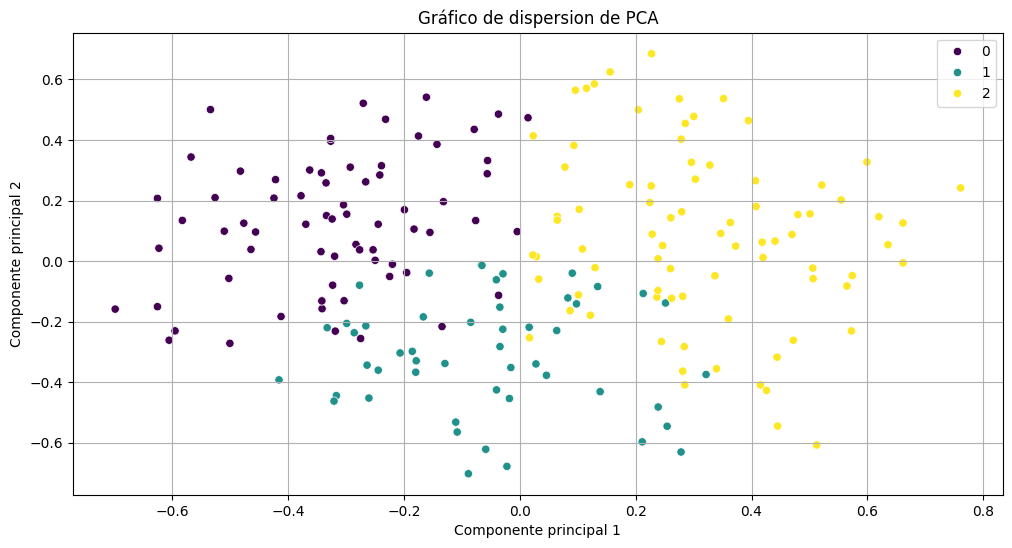

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_resultados[:, 0], y=pca_resultados[:, 1], hue=kmeans_cluster, palette='viridis')
plt.title('Gráfico de dispersion de PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

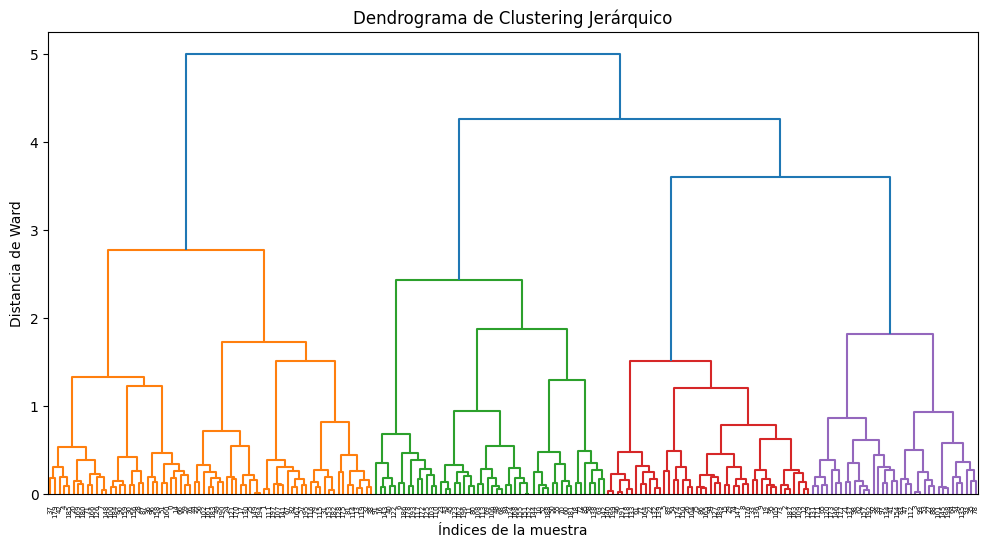

In [25]:
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancia de Ward')
plt.show()

### Interpretación y estrategias de Marketing

In [28]:
# Análisis de los clusters para determinar estrategias
cluster_info = pd.DataFrame({
    'Cluster': kmeans_cluster,
    'Edad': df['Edad'],
    'Ingresos': df['Ingresos Anuales (k$)'],
    'Gasto': df['Puntuación de Gasto (1-100)']   
})

# Descripción cluster
for cluster in cluster_info['Cluster'].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]
    print(f'Cluster {cluster}')
    print(f' - Edad media: {cluster_data["Edad"].mean():.2f}')
    print(f' - Ingresos medios: {cluster_data["Ingresos"].mean():.2f}')
    print(f' - Gasto medio: {cluster_data["Gasto"].mean():.2f}')

Cluster 2
 - Edad media: 49.67
 - Ingresos medios: 97.33
 - Gasto medio: 62.00
Cluster 0
 - Edad media: 42.97
 - Ingresos medios: 52.51
 - Gasto medio: 20.17
Cluster 1
 - Edad media: 34.06
 - Ingresos medios: 49.08
 - Gasto medio: 72.20


##### Cluster 0: Clientes de Edad Media con Ingresos medios y Gastos bajos

- Recomiendo aplicar descuentos y ofertas para atraer más a esta sección de clientes
- Brindar comunicación directa y personalizada puede ser una opción excelente para "amarrar" a los clientes


##### Cluster 1: Clientes Jovenes con Ingresos medios y Gastos altos

- El Marketing digital se debe potenciar, debido a que es la forma más eficiente de relacionarse con los jovenes
- La innovación y la incursión en nuevas tendencias es esencial para su estilo de vida

##### Cluster 2: Clientes Mayores con Ingresos altos y Gastos medio-altos

- Debido a la combinación entre ingresos altos y gastos moderados, este grupo podría estar interesado en productos o servicios de alta calidad y lujos
- Se debe dar una atención al cliente personalizada y directa para brindar una mejor experiencia al cliente
- Crear o mejorar programas de fidelización que ofrezca beneficios exclusivos como descuentos o servicios especiales